In [63]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic

os.chdir('C:/Users/kyleg/Entity-Matching-in-Online-Retail')
from utility_functions import *

from IPython.display import display, HTML


import warnings
warnings.filterwarnings('ignore')

# Training & Testing Data

In [3]:
os.chdir('D:/Documents/Large-Scale Product Matching/')
train_test_df_features = pd.read_csv('train_test_df_features.csv')
train_test_offers_df = pd.read_csv('train_test_offers_df.csv')


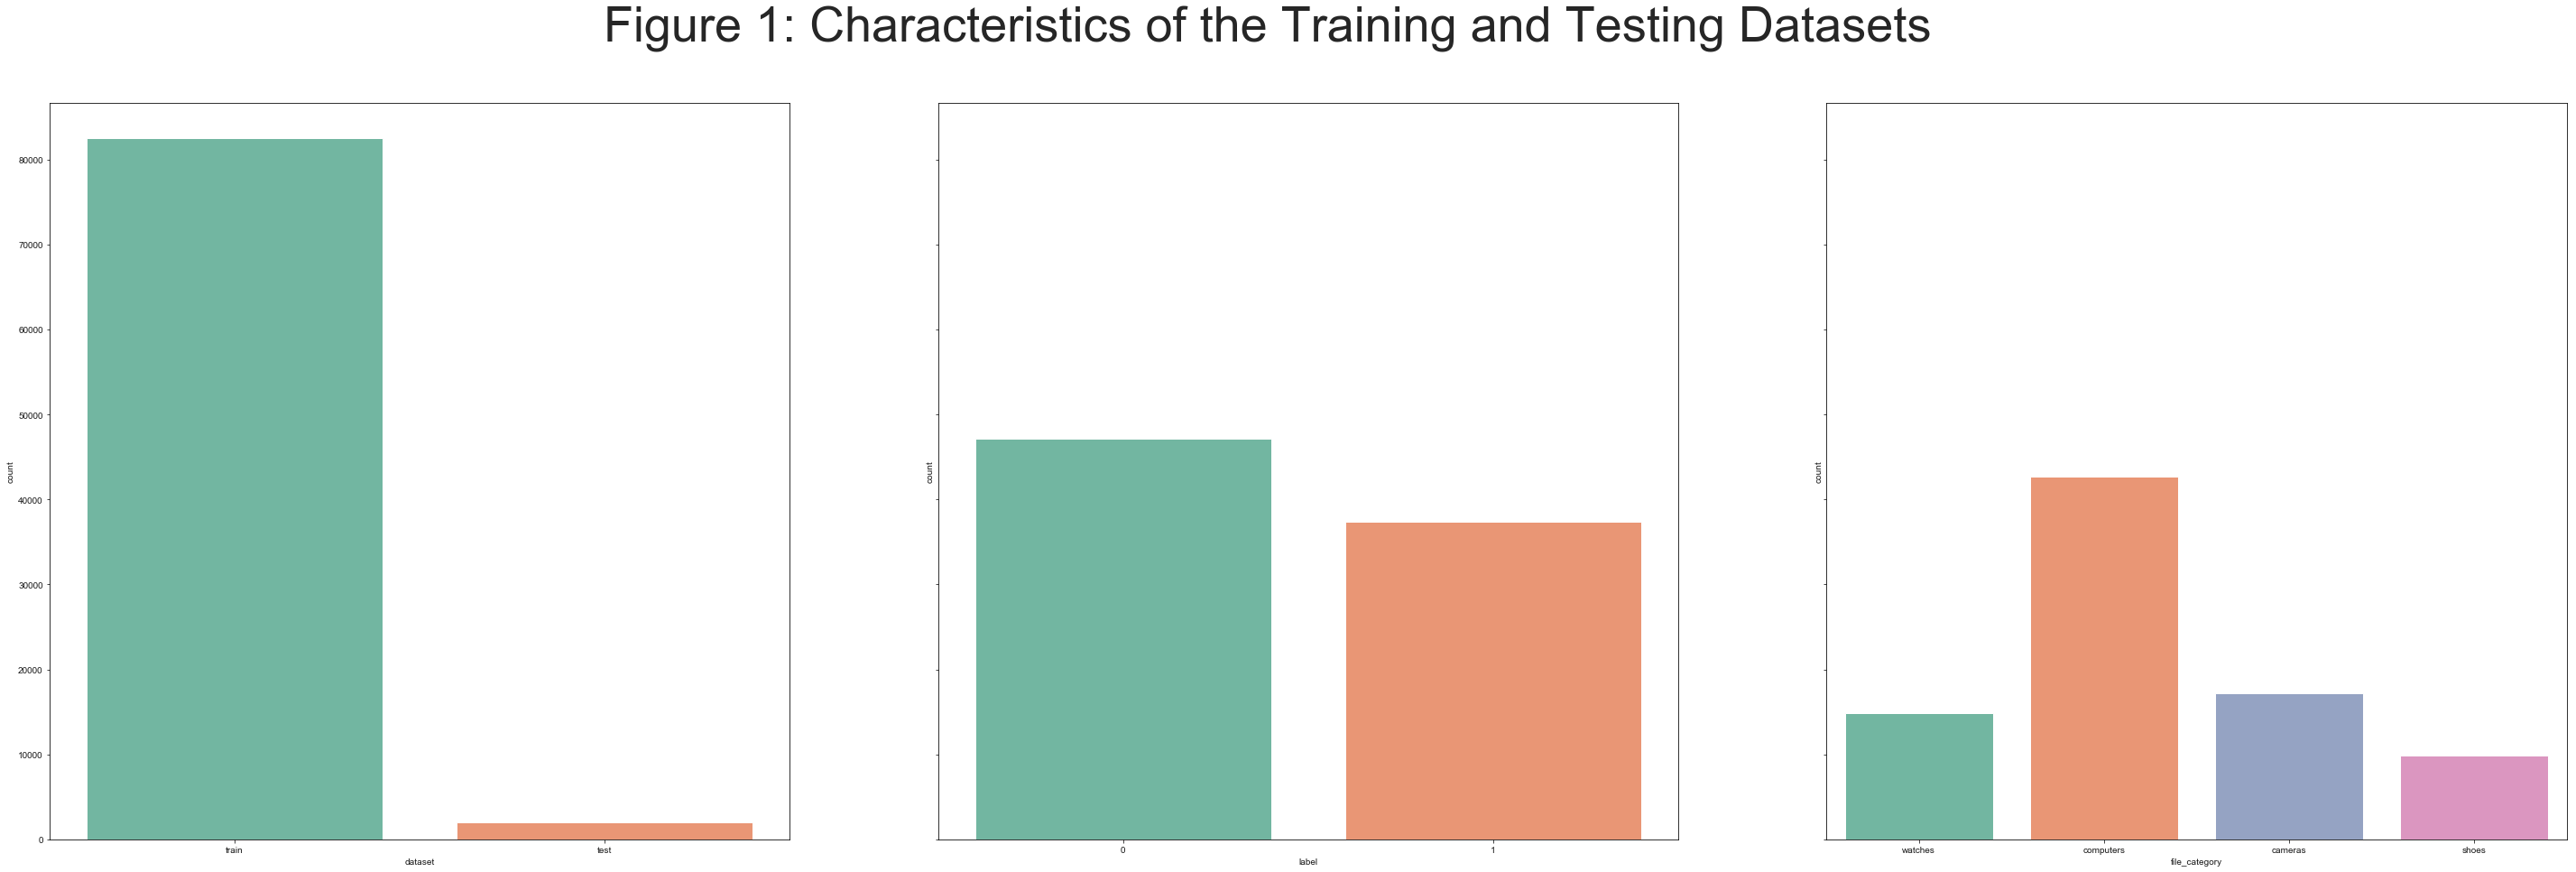

In [4]:
test_train_characteristics = train_test_df_features[['label', 'dataset', 'file_category']]

os.chdir('c:/users/kyleg/Entity-Matching-in-Online-Retail/')
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(50, 15), sharey=True) 

sns.set(font_scale=2)
plt.rcParams.update({'font.size': 45})
st = fig.suptitle("Figure 1: Characteristics of the Training and Testing Datasets")

sns.countplot(x='dataset', data=test_train_characteristics, palette=sns.color_palette("Set2"), ax=axes[0])

# mosaic plot: https://www.statsmodels.org/dev/generated/statsmodels.graphics.mosaicplot.mosaic.html
sns.countplot(x='label', data=test_train_characteristics, palette=sns.color_palette("Set2"), ax=axes[1])

sns.countplot(x='file_category', data=test_train_characteristics, palette=sns.color_palette("Set2"), ax=axes[2])

plt.savefig('plots/test_train_characteristics.png')

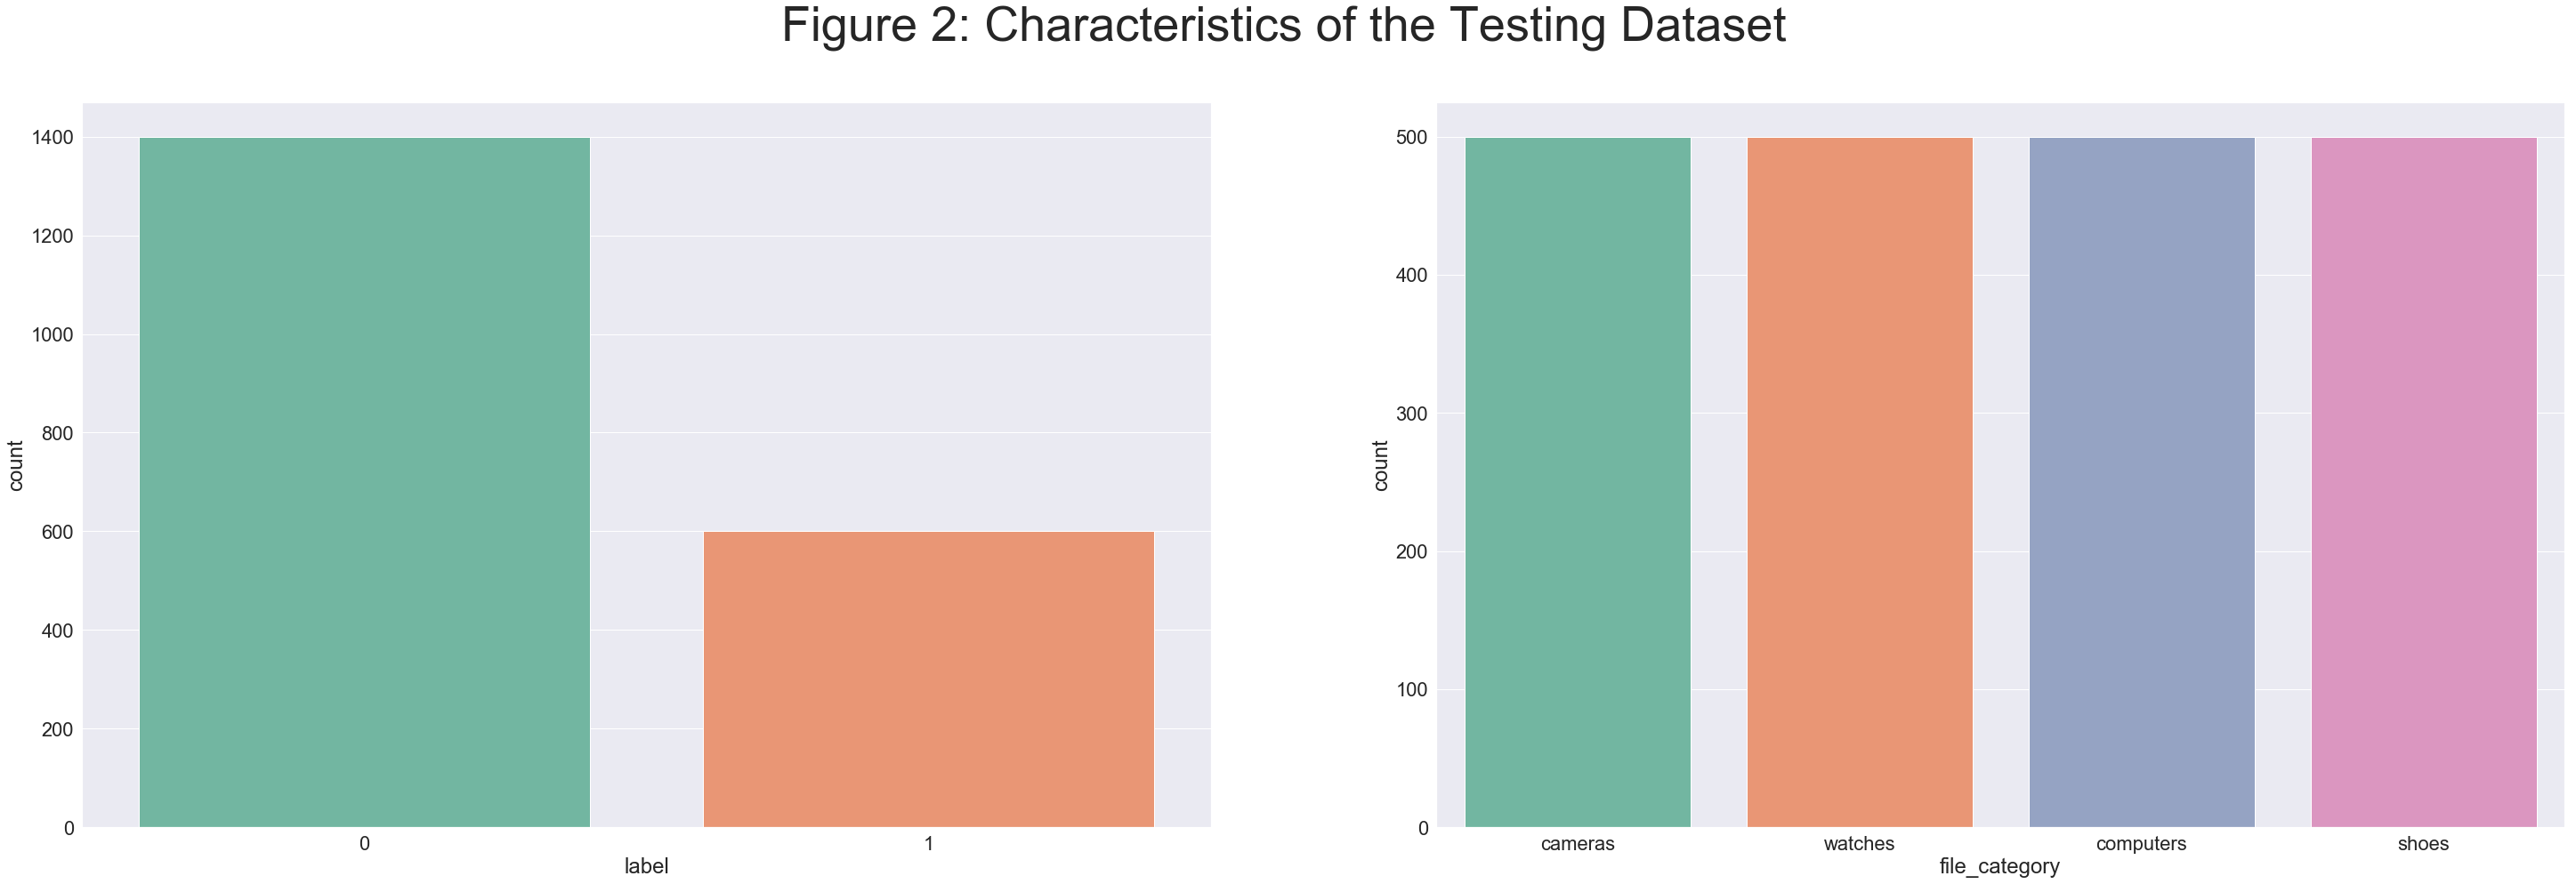

In [5]:
test_characteristics = test_train_characteristics[test_train_characteristics.dataset == 'test']
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(50, 15)) #

sns.set(font_scale=4)
plt.rcParams.update({'font.size': 45})
st = fig.suptitle("Figure 2: Characteristics of the Testing Dataset")

sns.countplot(x='label', data=test_characteristics, palette=sns.color_palette("Set2"), ax=axes[0])

sns.countplot(x='file_category', data=test_characteristics, palette=sns.color_palette("Set2"), ax=axes[1])

plt.savefig('plots/test_characteristics.png')

In [6]:
test_matches = train_test_df_features[(train_test_df_features.label == 1) &
                                      (train_test_df_features.dataset == 'test')][['file_category', 
                                                                                   'name_1', 
                                                                                   'name_2']]\
.sample(4, random_state=1)

pd.set_option('display.max_colwidth', 0)
h = HTML(test_matches.to_html(index=False))
display(h)

my_file = open('plots/table_1_matched_offer_pairs.html', 'w')
my_file.write(h.data)
my_file.close()

file_category,name_1,name_2
shoes,nike sportswear air force 1 07 white,sneakers buty nike air force 1 07 low white 315122 111
computers,323146 b21 bl20p g2 1p xeon 3 06ghz,323146 b21 bl20p xeon 3 06ghz
watches,daniel wellington dapper sheffield rose gold,daniel wellington men s dapper 38mm sheffield rose watch
cameras,canon eos rebel t5i,canon eos rebel t5i 18 135mm is stm digital slr camera kit black


# Offer Features




In [8]:
possible_features = ['brand', 'category', 'description', 'gtin', 'identifier', 'manufacturer','mpn', 'name', 'price', 'productID', 'sku']
train_test_offer_features = train_test_offers_df[possible_features]

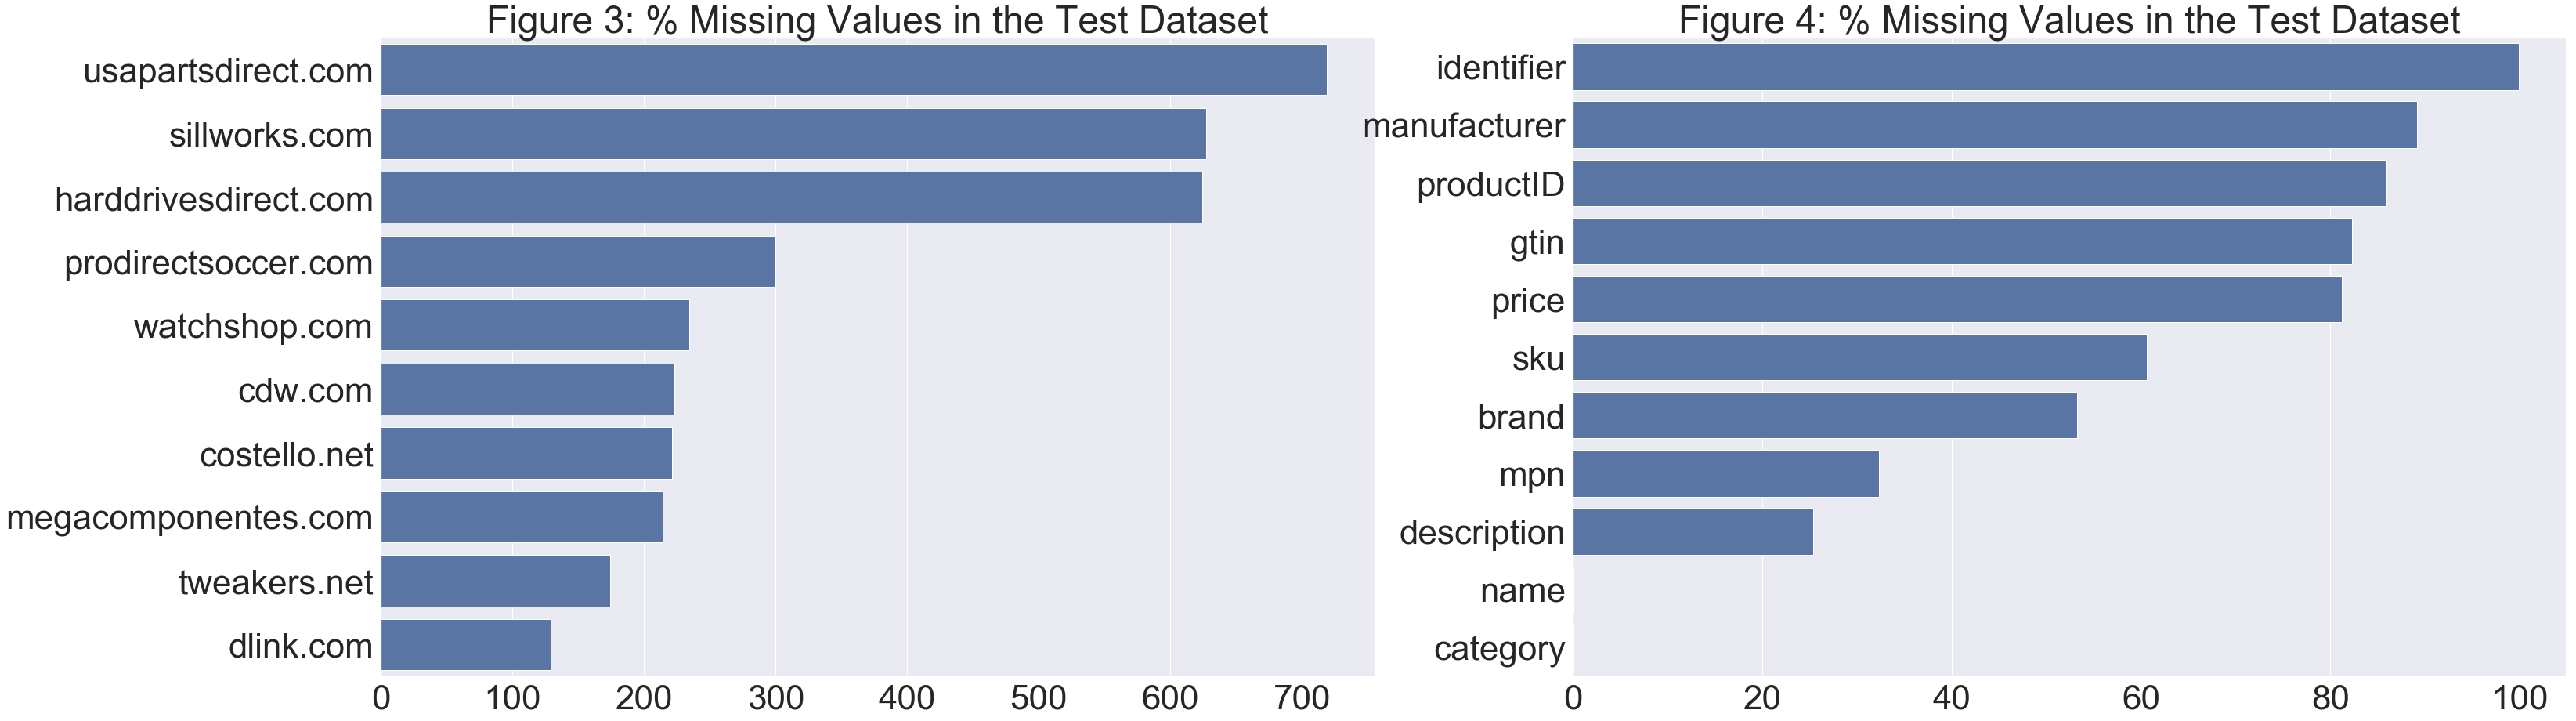

In [138]:
feature_nulls = calculate_percent_nulls(train_test_offer_features, print_series=False, return_series=True) #.sort_values()

domains = train_test_offers_df.domain.str.replace('www\.|de\.', '')\
    .value_counts().head(10)


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(50, 15))
sns.set(font_scale=4)
plt.rcParams.update({'font.size': 45})

sns.barplot(x=domains.values, y=domains.index, 
            color="b", ax=axes[0])\
            .set_title('Figure 3: % Missing Values in the Test Dataset')

sns.barplot(x=feature_nulls.values, y=feature_nulls.index, 
            color="b", ax=axes[1])\
            .set_title('Figure 4: % Missing Values in the Test Dataset')

fig.savefig("plots/feature_sparsity.png", bbox_inches = "tight")

In [146]:
# count words
name_length = train_test_offers_df.name.str.lower().str.split(expand=True).apply(lambda x: np.sum(pd.notnull(x)), 1).sort_values(ascending=False)
description_length = train_test_offers_df.description.str.lower().str.split(expand=True).apply(lambda x: np.sum(pd.notnull(x)), 1).sort_values(ascending=False)

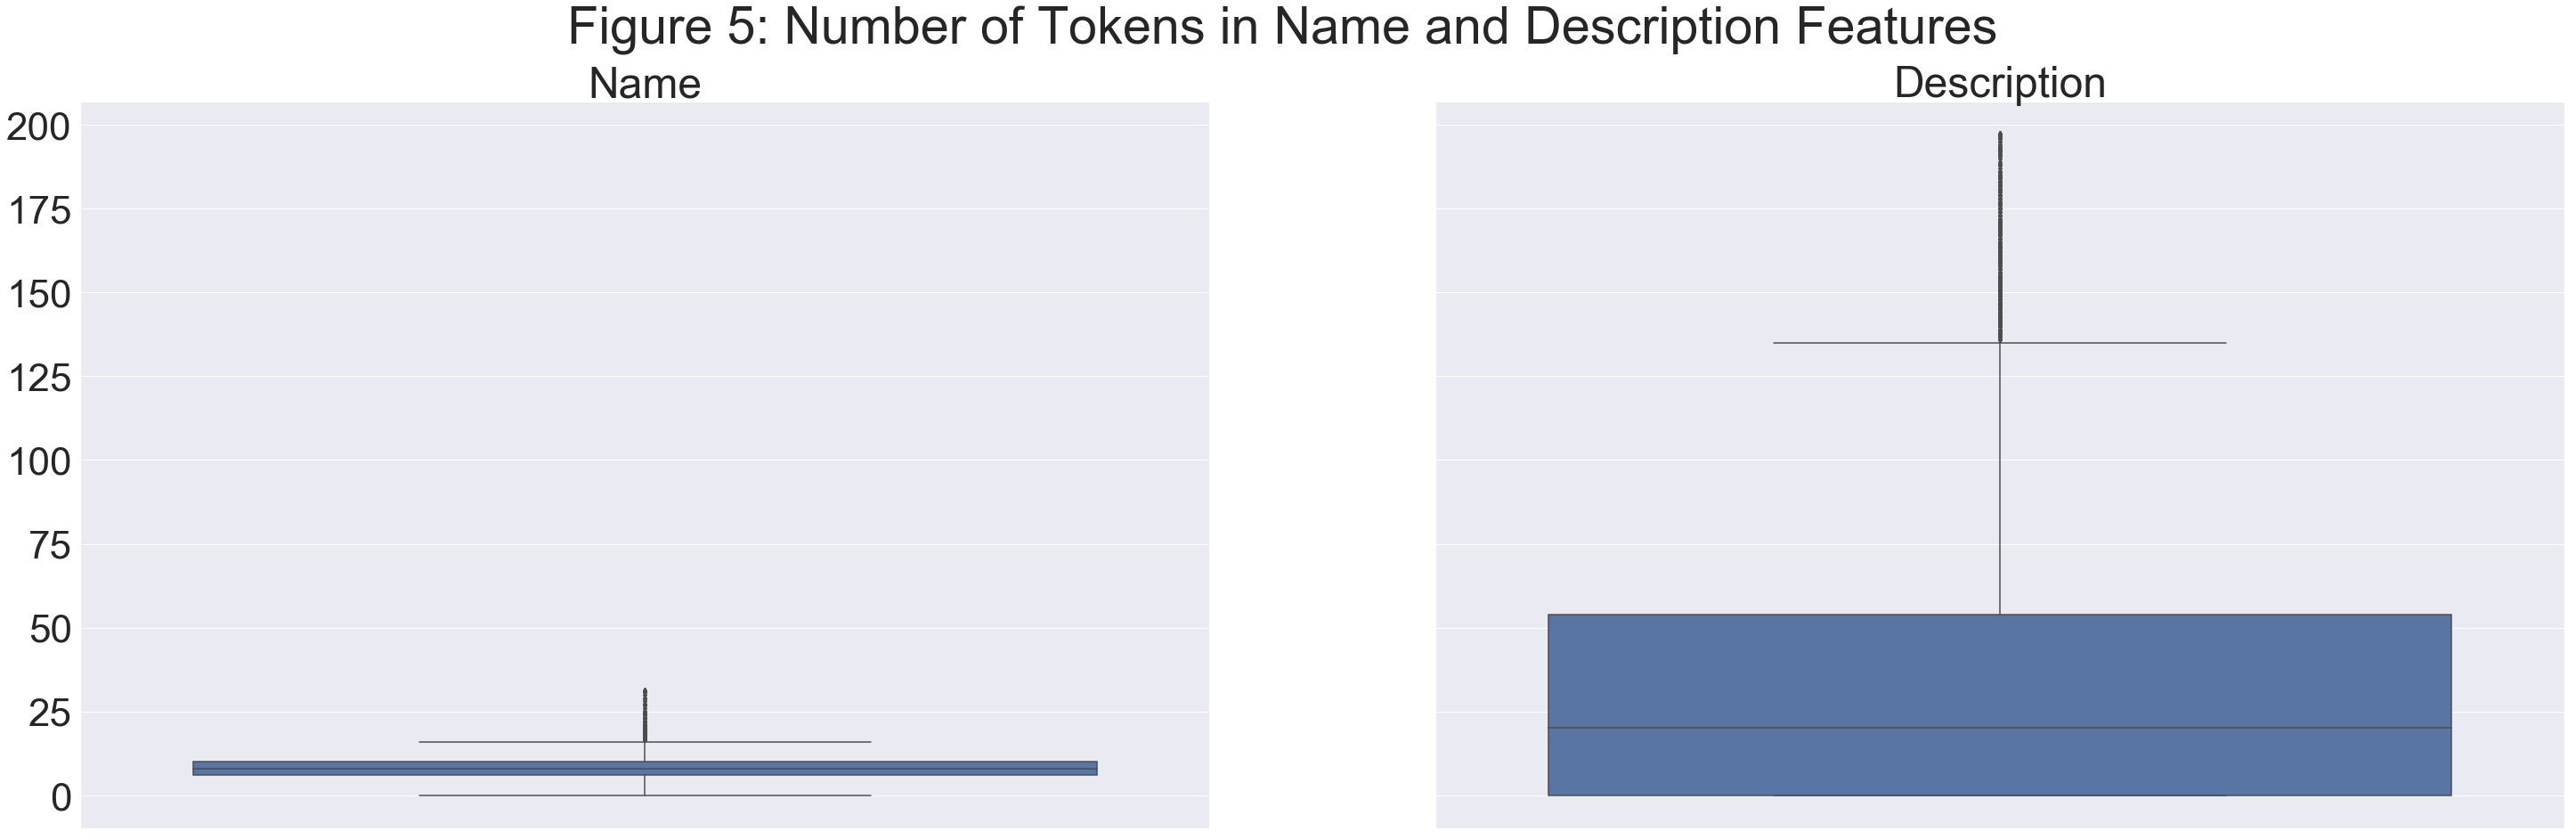

In [150]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(50, 15), sharey=True)
sns.set(font_scale=4)

st = fig.suptitle("Figure 5: Number of Tokens in Name and Description Features")
sns.boxplot(y=name_length[20:].values, ax=axes[0]).set_title('Name')
sns.boxplot(y=description_length[500:].values, ax=axes[1]).set_title('Description')
fig.savefig("plots/name_description_tokens.png")

In [152]:

print(np.median(name_length))
print(np.median(description_length))
description_length
train_test_offers_df.description[2:5].str.split(expand=True).apply(lambda x: np.sum(pd.notnull(x)), 1)

8.0
23.0


2    0 
3    0 
4    34
dtype: int64

In [119]:
sns.boxplot(y=description_length[1000:].values, ax=axes[1])

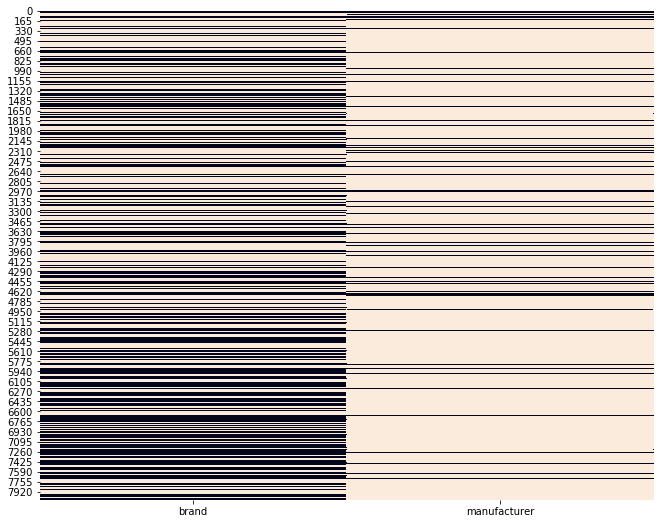

In [13]:
plt.figure(figsize=(11, 9))

offer_categories = train_test_offers_df.category.value_counts()
offer_categories_df = pd.DataFrame({'category': offer_categories.index, 'n': offer_categories})

sns.barplot(x='n', y='category', data=offer_categories_df)

sns.heatmap(train_test_offers_df[['brand', 'manufacturer']].isnull(), cbar=False)

,label,brand_1,brand_2,category_1,category_2,cluster_id_1,cluster_id_2,dataset,description_1,description_2,...,priceCurrency_1,priceCurrency_2,price_1,price_2,productID_1,productID_2,relationToParent_1,relationToParent_2,sku_1,sku_2
0,1,NaN,NaN,Jewelry,Jewelry,11213997,11213997,train,p this fine watch model number w20073x8 from c...,p this fine watch model number w20073x8 from c...,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.w3.org/1999/xhtml/microdata#item,http://www.w3.org/1999/xhtml/microdata#item,NaN,NaN
1,1,cartier,NaN,Jewelry,Jewelry,11213997,11213997,train,this cartier has undergone a thorough inspecti...,p this fine watch model number w20073x8 from c...,...,NaN,NaN,NaN,NaN,w20073x8,NaN,http://www.w3.org/1999/xhtml/microdata#item,http://www.w3.org/1999/xhtml/microdata#item,NaN,NaN
2,1,cartier,NaN,Jewelry,Jewelry,11213997,11213997,train,this cartier has undergone a thorough inspecti...,p this fine watch model number w20073x8 from c...,...,NaN,NaN,NaN,NaN,w20073x8,NaN,http://www.w3.org/1999/xhtml/microdata#item,http://www.w3.org/1999/xhtml/microdata#item,NaN,NaN
3,1,NaN,NaN,Jewelry,Jewelry,11213997,11213997,train,p this fine watch model number w20073x8 from c...,p this fine watch model number w20073x8 from c...,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.w3.org/1999/xhtml/microdata#item,http://www.w3.org/1999/xhtml/microdata#item,NaN,NaN
4,1,NaN,NaN,Jewelry,Jewelry,11213997,11213997,train,"""<p>This fine watch, model number W20073X8 fro...",p this fine watch model number w20073x8 from c...,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.w3.org/1999/xhtml/microdata#item,http://www.w3.org/1999/xhtml/microdata#item,NaN,NaN
5,1,NaN,NaN,Jewelry,Jewelry,11213997,11213997,train,NaN,p this fine watch model number w20073x8 from c...,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.w3.org/1999/xhtml/microdata#item,http://www.w3.org/1999/xhtml/microdata#item,NaN,NaN
6,1,cartier,NaN,Jewelry,Jewelry,11213997,11213997,train,this cartier has undergone a thorough inspecti...,p this fine watch model number w20073x8 from c...,...,NaN,NaN,NaN,NaN,w20073x8,NaN,http://www.w3.org/1999/xhtml/microdata#item,http://www.w3.org/1999/xhtml/microdata#item,NaN,NaN
7,1,cartier,NaN,Jewelry,Jewelry,11213997,11213997,train,this cartier has undergone a thorough inspecti...,p this fine watch model number w20073x8 from c...,...,NaN,NaN,NaN,NaN,w20073x8,NaN,http://www.w3.org/1999/xhtml/microdata#item,http://www.w3.org/1999/xhtml/microdata#item,NaN,NaN
8,1,NaN,NaN,Jewelry,Jewelry,11213997,11213997,train,"""<p>This fine watch, model number W20073X8 fro...",p this fine watch model number w20073x8 from c...,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.w3.org/1999/xhtml/microdata#item,http://www.w3.org/1999/xhtml/microdata#item,NaN,NaN
9,1,NaN,NaN,Jewelry,Jewelry,11213997,11213997,train,p this fine watch model number w20073x8 from c...,p this fine watch model number w20073x8 from c...,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.w3.org/1999/xhtml/microdata#item,http://www.w3.org/1999/xhtml/microdata#item,NaN,NaN
